<a href="https://colab.research.google.com/github/ha-yang1/Suzy-s-Memo/blob/main/Prophet%EC%9C%BC%EB%A1%9C_%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facebook prophet을 이용한 비트코인 시세 예측

* 딥러닝 > Prophet > ARIMA

In [4]:
# prophet 설치
!pip install prophet

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
from prophet import Prophet
import pandas as pd

In [31]:
# https://www.blockchain.com/ko/charts/market-price : 데이터원본

# JSON 파일 CSV 형태로 변환하기

import csv
import json

# JSON 읽기
with open('/content/sample_data/market-price.json', 'r') as f:
  json_data = json.load(f)

json_data = json_data['market-price']

print(json_data)

[{'x': 1688342400000, 'y': 30618.25}, {'x': 1688428800000, 'y': 31150.92}, {'x': 1688515200000, 'y': 30774.87}, {'x': 1688601600000, 'y': 30502.55}, {'x': 1688688000000, 'y': 29918.04}, {'x': 1688774400000, 'y': 30344.53}, {'x': 1688860800000, 'y': 30214.55}, {'x': 1688947200000, 'y': 30214.55}, {'x': 1689033600000, 'y': 30411.71}, {'x': 1689120000000, 'y': 30622.7}, {'x': 1689206400000, 'y': 30391.64}, {'x': 1689292800000, 'y': 31485.37}, {'x': 1689379200000, 'y': 30330.22}, {'x': 1689465600000, 'y': 30291.67}, {'x': 1689552000000, 'y': 30240.28}, {'x': 1689638400000, 'y': 30144.2}, {'x': 1689724800000, 'y': 29859.24}, {'x': 1689811200000, 'y': 29912.48}, {'x': 1689897600000, 'y': 29802.29}, {'x': 1689984000000, 'y': 29907.88}, {'x': 1690070400000, 'y': 29774.36}, {'x': 1690156800000, 'y': 30081.88}, {'x': 1690243200000, 'y': 29178.42}, {'x': 1690329600000, 'y': 29226.18}, {'x': 1690416000000, 'y': 29344.56}, {'x': 1690502400000, 'y': 29213.94}, {'x': 1690588800000, 'y': 29316.12}, {'

In [33]:
# csv 파일로 저장
csvfile_path = '/content/sample_data/market-price.csv'

with open(csvfile_path, 'w', newline='') as file:
    fieldnames = json_data[0].keys()
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerows(json_data)

# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv(csvfile_path, names=['ds', 'y'], header=0)

# DataFrame 출력
print(df.head())

              ds         y
0  1688342400000  30618.25
1  1688428800000  31150.92
2  1688515200000  30774.87
3  1688601600000  30502.55
4  1688688000000  29918.04


In [38]:
df['ds'] = pd.to_datetime(df['ds'], unit='ms')
df['y'] = df['y'].astype('float64')

df.head()

,ds,y
0,2023-07-03,30618.25
1,2023-07-04,31150.92
2,2023-07-05,30774.87
3,2023-07-06,30502.55
4,2023-07-07,29918.04


In [40]:
m = Prophet()

m.fit(df)

예측날짜 = m.make_future_dataframe(periods=30, freq='D')
예측값 = m.predict(예측날짜)
예측값.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppp_61yg3/y1nq6nfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppp_61yg3/2qnb51mr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94426', 'data', 'file=/tmp/tmppp_61yg3/y1nq6nfj.json', 'init=/tmp/tmppp_61yg3/2qnb51mr.json', 'output', 'file=/tmp/tmppp_61yg3/prophet_modelz5ng449j/prophet_model-20240701045514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
390,2024-07-27,64475.807900,60461.744382,67900.642324,63053.649502,65648.473418,-150.402754,-150.402754,-150.402754,-150.402754,-150.402754,-150.402754,0.0,0.0,0.0,64325.405147
391,2024-07-28,64453.627378,60408.365302,67628.865707,62953.475425,65729.754814,-264.535546,-264.535546,-264.535546,-264.535546,-264.535546,-264.535546,0.0,0.0,0.0,64189.091832
392,2024-07-29,64431.446857,60496.835898,68053.727866,62809.542550,65777.179840,-112.583585,-112.583585,-112.583585,-112.583585,-112.583585,-112.583585,0.0,0.0,0.0,64318.863271
393,2024-07-30,64409.266335,61043.877008,68331.702188,62698.244690,65862.334549,355.245062,355.245062,355.245062,355.245062,355.245062,355.245062,0.0,0.0,0.0,64764.511397
394,2024-07-31,64387.085813,60349.802759,68418.672641,62594.157974,65912.505202,-83.083433,-83.083433,-83.083433,-83.083433,-83.083433,-83.083433,0.0,0.0,0.0,64304.002379


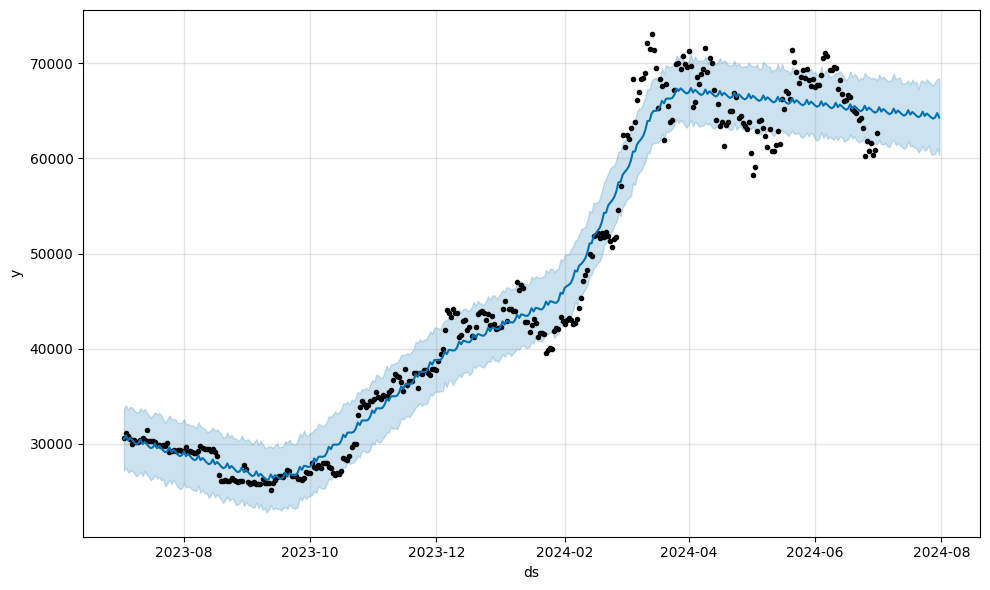

In [41]:
plot1 = m.plot(예측값)

In [47]:
m = Prophet(
    interval_width=0.95, #추세 변화의 가능성 (default=80)
    seasonality_mode = 'multiplicative', # additive(가법모델), multiplicative(승법모델)
    yearly_seasonality = True, #연도별 시즌성
    changepoint_prior_scale=0.5 # trend의 유연성 (default=0.05)
)

m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppp_61yg3/i8dy1u6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppp_61yg3/2i4jujxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15672', 'data', 'file=/tmp/tmppp_61yg3/i8dy1u6q.json', 'init=/tmp/tmppp_61yg3/2i4jujxt.json', 'output', 'file=/tmp/tmppp_61yg3/prophet_modelxtc2avhg/prophet_model-20240701045841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:58:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
예측날짜 = m.make_future_dataframe(periods=30, freq='D')
예측값 = m.predict(예측날짜)
예측값.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
390,2024-07-27,34405.133367,36893.019244,43903.533324,32959.747846,36091.674273,0.168189,0.168189,0.168189,-0.002925,-0.002925,-0.002925,0.171114,0.171114,0.171114,0.0,0.0,0.0,40191.697472
391,2024-07-28,34163.540389,35985.902508,43044.252881,32616.981466,35917.180141,0.155839,0.155839,0.155839,-0.005958,-0.005958,-0.005958,0.161797,0.161797,0.161797,0.0,0.0,0.0,39487.547636
392,2024-07-29,33921.947412,35742.705336,42609.379168,32294.306687,35742.686009,0.151275,0.151275,0.151275,-0.001668,-0.001668,-0.001668,0.152943,0.152943,0.152943,0.0,0.0,0.0,39053.500688
393,2024-07-30,33680.354435,35351.990349,42307.637231,31993.343148,35568.191877,0.152783,0.152783,0.152783,0.008296,0.008296,0.008296,0.144488,0.144488,0.144488,0.0,0.0,0.0,38826.148894
394,2024-07-31,33438.761458,34019.022452,41541.657492,31671.701729,35394.371948,0.132899,0.132899,0.132899,-0.003456,-0.003456,-0.003456,0.136355,0.136355,0.136355,0.0,0.0,0.0,37882.747533


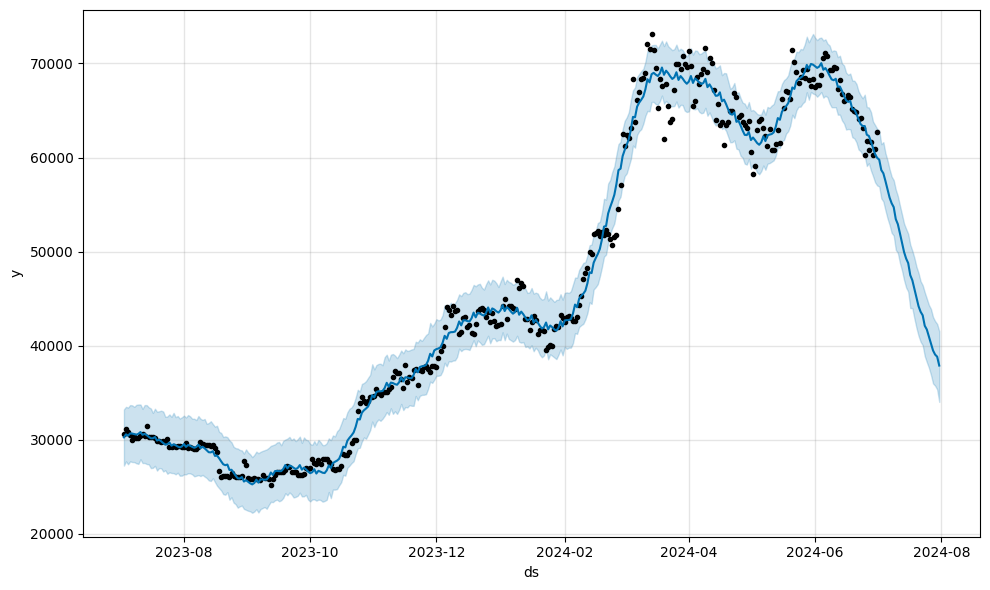

In [49]:
plot1 = m.plot(예측값)